In [1]:
# Import libraries
import numpy as np
import pandas as pd
import os
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import the last updated merged data frame
pd.set_option('display.max_columns', None)
path = r'C:\Users\98912\MAY 2022 Instacart Analysis'
df_merged = pd.read_pickle(os.path.join(path, '02-Data','Prepared Data', 'final_mergedv4.pkl'))
df_merged.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,order_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_prder_price,spending_flag,order_frequency,frequency_flag,region,activity_flag,age_group,income_group,goods_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30,196,Soda,77,7,9,both,Mid-range product,Regularly busy,Busiest days,Most orders,8,New_customer,7.988889,Low spender,19,Regular customer,Midwest_region,High_activity,40-50,150k-175k,Beverages
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11,196,Soda,77,7,9,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New_customer,7.988889,Low spender,19,Regular customer,Midwest_region,High_activity,40-50,150k-175k,Beverages
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10,196,Soda,77,7,9,both,Mid-range product,Regularly busy,Busiest days,Most orders,8,New_customer,7.988889,Low spender,19,Regular customer,Midwest_region,High_activity,40-50,150k-175k,Beverages
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14,38928,0% Greek Strained Yogurt,120,16,12,both,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New_customer,7.988889,Low spender,19,Regular customer,Midwest_region,High_activity,40-50,150k-175k,Dairy eggs
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30,38928,0% Greek Strained Yogurt,120,16,12,both,Mid-range product,Regularly busy,Slowest days,Most orders,8,New_customer,7.988889,Low spender,19,Regular customer,Midwest_region,High_activity,40-50,150k-175k,Dairy eggs


## Prepare visualization for final report

### Key question 1:

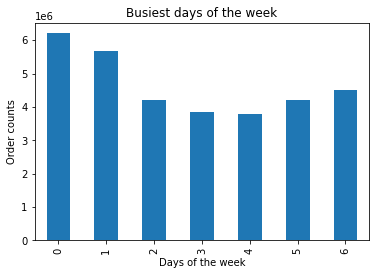

In [4]:
# busiest days of the week
bar1 = df_merged['order_day_of_week'].value_counts().sort_index().plot.bar(xlabel = 'Days of the week', ylabel = 'Order counts', title = 'Busiest days of the week')

In [5]:
# save the chart
bar1.figure.savefig(os.path.join(path, '04-Analysis', 'busydays.png'))

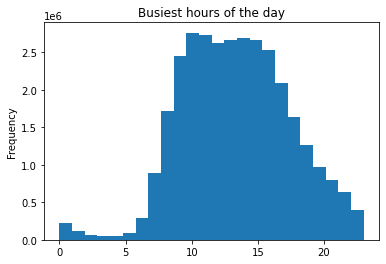

In [6]:
#  busiest hours of the day
hist2 = df_merged['order_hour_of_day'].plot.hist(bins=24, ylabel = 'Order counts', title = 'Busiest hours of the day',  xlabel = 'Hours of the day' )

In [7]:
# save the chart
hist2.figure.savefig(os.path.join(path, '04-Analysis', 'busiesthours.png'))

### Key Question 2:

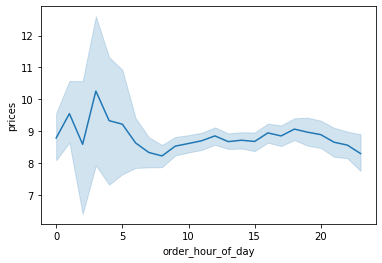

In [8]:
#  price in different hours of the day 
line2 = sns.lineplot(data=df_merged, x='order_hour_of_day', y='prices')

In [9]:
# save the chart
line2.figure.savefig(os.path.join(path, '04-Analysis', 'pricehour.png'))

### Key Question 3:

In [19]:
#  products price ranges
price_range = df_merged.groupby('product_id').agg({'price_range_loc' : 'max' })
price_range

,price_range_loc
product_id,
1,Mid-range product
10,Mid-range product
100,Low-range product
1000,Mid-range product
10000,Low-range product
...,...
9995,Low-range product
9996,Low-range product
9997,Low-range product


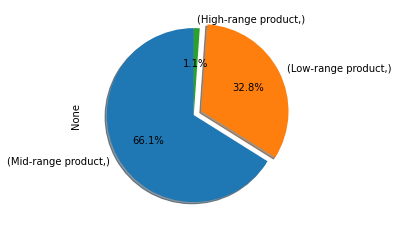

In [20]:
# drawing pie chart
explode = (0, 0.1, 0)
piechart1 = price_range.value_counts().plot.pie(autopct='%1.1f%%',
        shadow=True, startangle=90, explode = explode, title = None)

In [21]:
# save the chart
piechart1.figure.savefig(os.path.join(path, '04-Analysis', 'pricedist.png'))

### key Question 4:

In [13]:
#  popularity of different product categories
# the drawing was prepared in part 1 script

### Key Question 5:

In [22]:
#  loyalty distribution
loyalty_dist = df_merged.groupby('user_id').agg({'loyalty_flag' : 'max' })
loyalty_dist

,loyalty_flag
user_id,
1,New_customer
2,Regular_customer
3,Regular_customer
4,New_customer
5,New_customer
...,...
206205,New_customer
206206,Loyal_customer
206207,Regular_customer


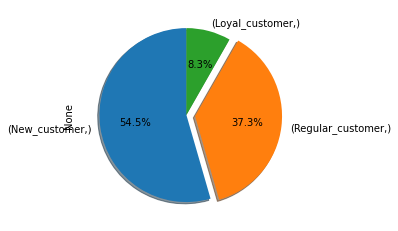

In [23]:

Piechart2 = loyalty_dist.value_counts().plot.pie(autopct='%1.1f%%',
        shadow=True, startangle=90, explode = explode)

In [24]:
# save the chart
Piechart2.figure.savefig(os.path.join(path, '04-Analysis', 'loyaltydistr.png'))

In [26]:
#  how often customers return
# in customer level aggregation
loyalty_frequency = df_merged.groupby('user_id').agg({'loyalty_flag' : 'max' , 'frequency_flag': 'max'})
loyalty_frequency

,loyalty_flag,frequency_flag
user_id,,
1,New_customer,Regular customer
2,Regular_customer,Regular customer
3,Regular_customer,Frequent customer
4,New_customer,Regular customer
5,New_customer,Regular customer
...,...,...
206205,New_customer,Frequent customer
206206,Loyal_customer,Frequent customer
206207,Regular_customer,Frequent customer


In [27]:
# create pivot table 
xtab_loyalty_frequency = pd.crosstab(loyalty_frequency['loyalty_flag'], loyalty_frequency['frequency_flag'], dropna=False)
xtab_loyalty_frequency

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
loyalty_flag,,,
Loyal_customer,17011,0,6
New_customer,42210,38094,32024
Regular_customer,44225,5185,27454


In [32]:
xtab_loyalty_frequency.to_clipboard()

In [28]:
17011+42210+38094+32024+44225+5185+27457

206206

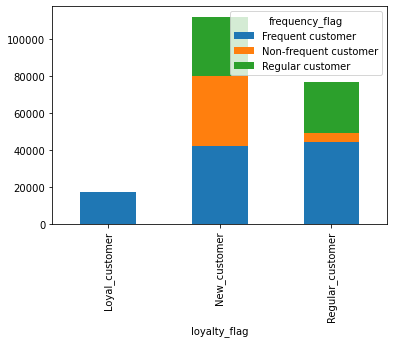

In [29]:
loyalty_frequency_plot = xtab_loyalty_frequency.plot(kind='bar', stacked=True)

In [30]:
# save the plot
loyalty_frequency_plot.figure.savefig(os.path.join(path, '04-Analysis', 'loyalty_frequency.png'))

### Key question 6:

In [34]:
# loyalty and expending habits
# in customer level aggregation
loyalty_spending = df_merged.groupby('user_id').agg({'loyalty_flag' : 'max' , 'spending_flag': 'max'})
loyalty_spending

,loyalty_flag,spending_flag
user_id,,
1,New_customer,Low spender
2,Regular_customer,Low spender
3,Regular_customer,Low spender
4,New_customer,Low spender
5,New_customer,Low spender
...,...,...
206205,New_customer,Low spender
206206,Loyal_customer,Low spender
206207,Regular_customer,Low spender


In [35]:
# create pivot table 
xtab_loyalty_spending = pd.crosstab(loyalty_spending['loyalty_flag'], loyalty_spending['spending_flag'], dropna=False)
xtab_loyalty_spending

spending_flag,High spender,Low spender
loyalty_flag,,
Loyal_customer,373,16644
New_customer,3372,108956
Regular_customer,1612,75252


In [36]:
373+16644+3372+108956+1612+75252

206209

In [39]:
xtab_loyalty_spending.to_clipboard()

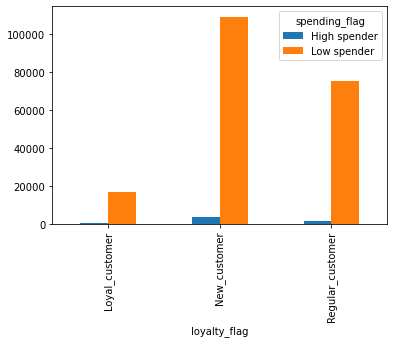

In [37]:
loyalty_spending_plot = xtab_loyalty_spending.plot(kind='bar', stacked=False)

In [38]:
# save the plot
loyalty_spending_plot.figure.savefig(os.path.join(path, '04-Analysis', 'loyalty_spending.png'))

### Key Question 7:

In [41]:
# differences in ordering habits based on a customer’s region
# create table in customer level
region_spend_loya_freq = df_merged.groupby('user_id'). agg({'region': 'max','spending_flag':'max', 'loyalty_flag': 'max', 'frequency_flag':'max'})
region_spend_loya_freq

,region,spending_flag,loyalty_flag,frequency_flag
user_id,,,,
1,South_region,Low spender,New_customer,Regular customer
2,West_region,Low spender,Regular_customer,Regular customer
3,West_region,Low spender,Regular_customer,Frequent customer
4,South_region,Low spender,New_customer,Regular customer
5,West_region,Low spender,New_customer,Regular customer
...,...,...,...,...
206205,West_region,Low spender,New_customer,Frequent customer
206206,West_region,Low spender,Loyal_customer,Frequent customer
206207,Midwest_region,Low spender,Regular_customer,Frequent customer


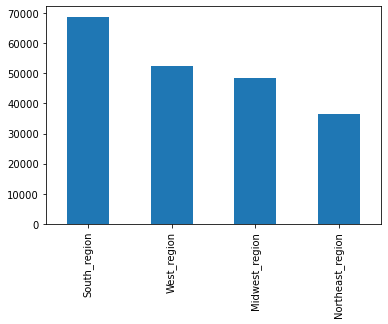

In [50]:
Region_frequency_plot = region_spend_loya_freq['region'].value_counts().plot.bar()

In [42]:
xtab_region_spending = pd.crosstab(region_spend_loya_freq['region'], region_spend_loya_freq['spending_flag'], dropna=False)
xtab_region_spending

spending_flag,High spender,Low spender
region,,
Midwest_region,1263,47256
Northeast_region,883,35505
South_region,1817,66920
West_region,1394,51171


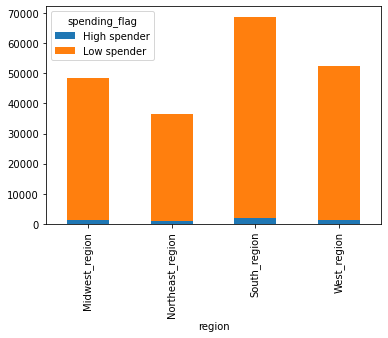

In [43]:
region_spending_plot = xtab_region_spending.plot(kind='bar', stacked=True)

In [44]:
xtab_region_loyalty = pd.crosstab(region_spend_loya_freq['region'], region_spend_loya_freq['loyalty_flag'], dropna=False)
xtab_region_loyalty

loyalty_flag,Loyal_customer,New_customer,Regular_customer
region,,,
Midwest_region,3991,26333,18195
Northeast_region,3027,19869,13492
South_region,5637,37491,25609
West_region,4362,28635,19568


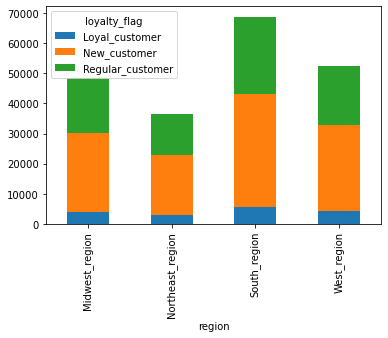

In [45]:
region_loyalty_plot = xtab_region_loyalty.plot(kind='bar', stacked=True)

In [46]:
xtab_region_frequency = pd.crosstab(region_spend_loya_freq['region'], region_spend_loya_freq['frequency_flag'], dropna=False)
xtab_region_frequency

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
region,,,
Midwest_region,24246,10227,14046
Northeast_region,18294,7581,10513
South_region,34438,14521,19778
West_region,26468,10950,15147


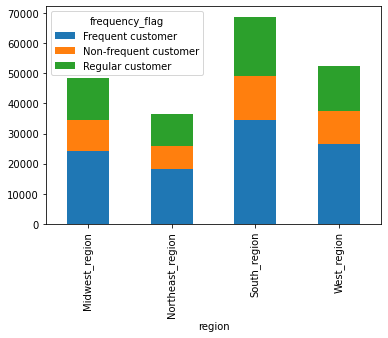

In [47]:
region_loyalty_frequency = xtab_region_frequency.plot(kind='bar', stacked=True)

###  Key Question 8:

In [52]:
# connection between age and family status in terms of ordering habits
age_famistatus_loyalty_frequency_spending = df_merged.groupby('user_id').agg({'age_group': 'max', 
                                    'family_status': 'max','spending_flag':'max','loyalty_flag': 'max', 'frequency_flag':'max'})
age_famistatus_loyalty_frequency_spending.head()

,age_group,family_status,spending_flag,loyalty_flag,frequency_flag
user_id,,,,,
1,30-40,married,Low spender,New_customer,Regular customer
2,60-70,married,Low spender,Regular_customer,Regular customer
3,30-40,married,Low spender,Regular_customer,Frequent customer
4,30-40,married,Low spender,New_customer,Regular customer
5,70-80,divorced/widowed,Low spender,New_customer,Regular customer


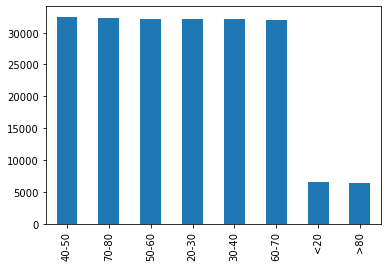

In [54]:
# age_group frequency in customers
age_group_counts = age_famistatus_loyalty_frequency_spending['age_group'].value_counts().plot.bar()

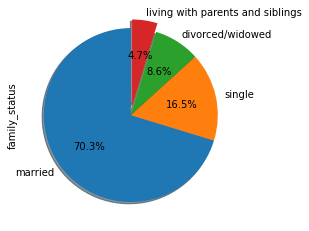

In [62]:
# family_status frequency in customers
explode = (0, 0, 0, 0.1)
family_status_counts_plot = age_famistatus_loyalty_frequency_spending['family_status'].value_counts().plot.pie(autopct='%1.1f%%',
        shadow=True, startangle=90, explode = explode)


In [58]:
144906+33962+17640+9701

206209

In [69]:
xtab_age_familstatus = pd.crosstab(age_famistatus_loyalty_frequency_spending['age_group'], 
                                           age_famistatus_loyalty_frequency_spending['family_status'], 
                                           dropna=False)
xtab_age_familstatus

family_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
20-30,0,4802,19252,8090
30-40,0,0,24028,8070
40-50,0,0,24386,8123
50-60,0,0,24153,8054
60-70,7978,0,23988,0
70-80,8005,0,24298,0
<20,0,4899,0,1625
>80,1657,0,4801,0


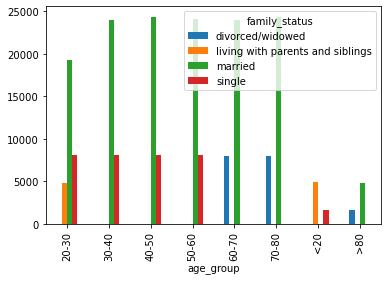

In [70]:
xtab_age_familstatus_plot = xtab_age_familstatus.plot(kind='bar', stacked=False)

In [72]:
xtab_age_loyalty = pd.crosstab(age_famistatus_loyalty_frequency_spending['age_group'], 
                                           age_famistatus_loyalty_frequency_spending['loyalty_flag'], 
                                           dropna=False)
xtab_age_loyalty

loyalty_flag,Loyal_customer,New_customer,Regular_customer
age_group,,,
20-30,2618,17554,11972
30-40,2617,17499,11982
40-50,2714,17671,12124
50-60,2695,17584,11928
60-70,2633,17488,11845
70-80,2649,17469,12185
<20,517,3590,2417
>80,574,3473,2411


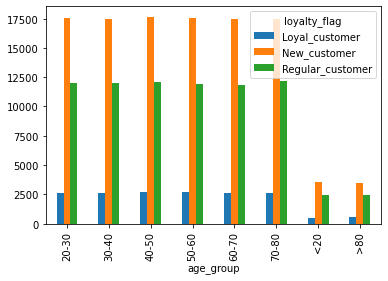

In [73]:
age_loyalty_plot = xtab_age_loyalty.plot(kind='bar', stacked=False)

In [74]:
xtab_familstatus_loyalty = pd.crosstab(age_famistatus_loyalty_frequency_spending['family_status'], 
                                           age_famistatus_loyalty_frequency_spending['loyalty_flag'], 
                                           dropna=False)
xtab_familstatus_loyalty

loyalty_flag,Loyal_customer,New_customer,Regular_customer
family_status,,,
divorced/widowed,1452,9590,6598
living with parents and siblings,810,5255,3636
married,11940,78942,54024
single,2815,18541,12606


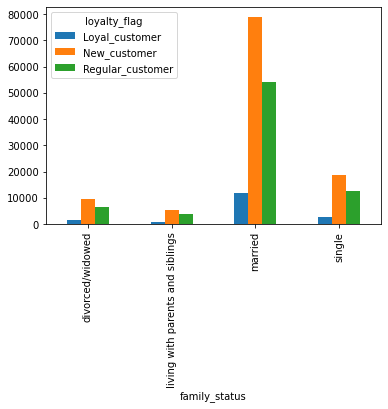

In [75]:
familstatus_loyalty = xtab_familstatus_loyalty.plot(kind='bar', stacked=False)

### Key Question 9: 


In [ ]:
# prepared in part 1 script

### key Question 10:

In [78]:
#  differences in ordering habits of different customer profiles
xtab_age_spending = pd.crosstab(age_famistatus_loyalty_frequency_spending['age_group'], 
                                           age_famistatus_loyalty_frequency_spending['spending_flag'], 
                                           dropna=False)
xtab_age_spending

spending_flag,High spender,Low spender
age_group,,
20-30,806,31338
30-40,844,31254
40-50,886,31623
50-60,872,31335
60-70,814,31152
70-80,811,31492
<20,169,6355
>80,155,6303


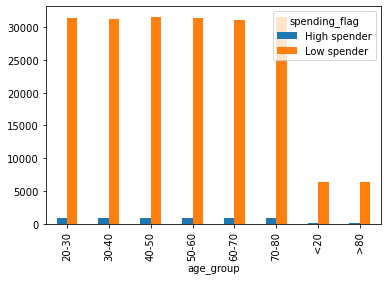

In [79]:
xtab_age_spending_plot = xtab_age_spending.plot(kind='bar', stacked=False)

In [80]:
xtab_age_frequency = pd.crosstab(age_famistatus_loyalty_frequency_spending['age_group'], 
                                           age_famistatus_loyalty_frequency_spending['frequency_flag'], 
                                           dropna=False)
xtab_age_frequency

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
age_group,,,
20-30,16113,6791,9240
30-40,15962,6777,9359
40-50,16350,6894,9265
50-60,16195,6649,9363
60-70,15949,6729,9288
70-80,16346,6725,9232
<20,3238,1402,1884
>80,3293,1312,1853


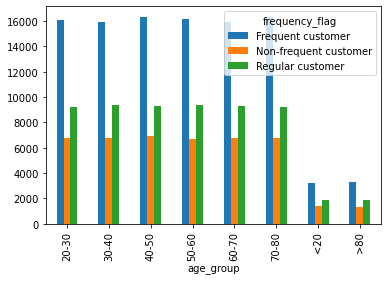

In [81]:
xtab_age_frequency_plot = xtab_age_frequency.plot(kind = 'bar', stacked = False)

In [82]:
xtab_familstatus_spending = pd.crosstab(age_famistatus_loyalty_frequency_spending['family_status'], 
                                           age_famistatus_loyalty_frequency_spending['spending_flag'], 
                                           dropna=False)
xtab_familstatus_spending

spending_flag,High spender,Low spender
family_status,,
divorced/widowed,444,17196
living with parents and siblings,244,9457
married,3764,141142
single,905,33057


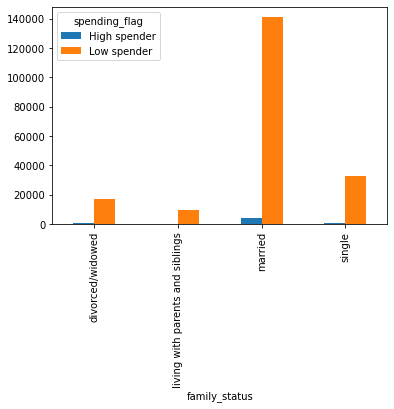

In [83]:
xtab_familstatus_spending_plot = xtab_familstatus_spending.plot(kind = 'bar', stacked = False)

In [84]:
xtab_familstatus_frequency = pd.crosstab(age_famistatus_loyalty_frequency_spending['family_status'], 
                                           age_famistatus_loyalty_frequency_spending['frequency_flag'], 
                                           dropna=False)
xtab_familstatus_frequency

frequency_flag,Frequent customer,Non-frequent customer,Regular customer
family_status,,,
divorced/widowed,8936,3623,5081
living with parents and siblings,4887,2076,2738
married,72702,30477,41727
single,16921,7103,9938


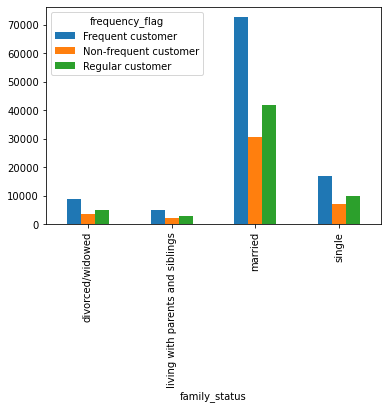

In [85]:
xtab_familstatus_frequency_plot = xtab_familstatus_frequency.plot(kind = 'bar', stacked = False)